# imports
> processes
* connect with google drive
* install catboost
* import everything

In [153]:
#connect with google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
#install catboost
!pip install catboost

In [155]:
#import everything
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.feature_extraction import FeatureHasher
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import precision_recall_fscore_support, classification_report
from imblearn.over_sampling import RandomOverSampler
warnings.filterwarnings('ignore')


# data reading
> variables decleared:
*   train_data
*   test_data
*   dataset
* columns

> processes:
* put the train data in a df
* put the test data in a df
* concatinate the data in one df



In [156]:
#put the train data in a df
train_data = pd.read_csv('/content/drive/MyDrive/kdd dataset/KDDTrain+.txt')
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
train_data.columns = columns
train_data = train_data.drop('level', axis=1)

In [157]:
#put the test data in a df
test_data = pd.read_csv('/content/drive/MyDrive/kdd dataset/KDDTest+.txt')
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
test_data.columns = columns
test_data = test_data.drop('level', axis=1)

In [158]:
#concatinate the data in one df
dataset=pd.concat([train_data,test_data])

# data preparing
> variables decleared:
* x_train, x_test, y_train, y_test
* object_columns
* X, y


> processes:
* shuffling
* target encoding
* splitting
* features encoding
* scaling

In [159]:
#suffling
dataset = dataset.sample(frac=1)

In [160]:
#target encoding
target_label = 'attack'
all_classes = set(dataset[target_label].unique())
class_mapping = {class_name: i for i, class_name in enumerate(all_classes)}
dataset[target_label] = dataset[target_label].map(class_mapping)

In [161]:
#splitting
X = dataset.drop('attack', axis=1)
y = dataset['attack']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)

In [162]:
#features encoding
object_columns = x_train.select_dtypes(include=['object','string']).columns
for column in object_columns:
    label_encoder = LabelEncoder()
    x_train[column] = label_encoder.fit_transform(x_train[column])
    x_test[column] = label_encoder.transform(x_test[column])

In [163]:
#Scaling
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

# base model
> variables
* base model
* precision, recall, f1, support
> processes
* train the base model and show the f1 score
* show the recall for each class
* print reports for classes under 100 support


In [164]:
# train the base model and show the f1 score
n_estimators_val = 20
max_depth_val = 100
random_state_val = 42

base_model = RandomForestClassifier(n_estimators=n_estimators_val, max_depth=max_depth_val, random_state=random_state_val)
base_model.fit(x_train, y_train)

y_pred = base_model.predict(x_test)

f1 = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)

F1 Score: 0.9905920766402874


In [165]:
#show the recall for each class
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.75      0.86         4
           2       0.00      0.00      0.00         5
           3       0.98      0.98      0.98       271
           4       0.95      0.97      0.96       470
           5       0.50      0.25      0.33         4
           6       0.84      0.56      0.68        96
           7       0.99      1.00      0.99     23116
           8       1.00      1.00      1.00        88
           9       0.96      0.97      0.97      1310
          10       0.99      0.99      0.99       926
          11       0.90      0.97      0.93        73
          12       0.57      0.57      0.57         7
          13       0.99      0.98      0.98      1122
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00       395
          17       1.00    

In [166]:
base_line_f2_score = fbeta_score(y_test, y_pred, average="macro", beta=2)
base_line_f2_score

0.5607679734587665

In [167]:
pred = []
real = []
total_test = y_test.tolist()
total_predict = y_pred.tolist()
for i in total_test:
  if total_test[i] == 7:
    real.append(0)
  else:
    real.append(1)
for i in total_predict:
  if total_predict[i] == 7:
    pred.append(0)
  else:
    pred.append(1)
class_report = classification_report(real,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17436
           1       1.00      1.00      1.00     27119

    accuracy                           1.00     44555
   macro avg       1.00      1.00      1.00     44555
weighted avg       1.00      1.00      1.00     44555



In [168]:
# print reports for classes under 100 support
class_labels = set(y_test) & set(y_pred)

for label in class_labels:
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=[label])

    if support[0] < 100:
        print(f"Class {label} Metrics:")
        print(classification_report(y_test, y_pred, labels=[label]))

Class 1 Metrics:
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4

   micro avg       1.00      0.75      0.86         4
   macro avg       1.00      0.75      0.86         4
weighted avg       1.00      0.75      0.86         4

Class 2 Metrics:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         5

   micro avg       0.00      0.00      0.00         5
   macro avg       0.00      0.00      0.00         5
weighted avg       0.00      0.00      0.00         5

Class 5 Metrics:
              precision    recall  f1-score   support

           5       0.50      0.25      0.33         4

   micro avg       0.50      0.25      0.33         4
   macro avg       0.50      0.25      0.33         4
weighted avg       0.50      0.25      0.33         4

Class 6 Metrics:
              precision    recall  f1-score   support

           6       0.84      0.56      0.68        96

   

# over sampling
> var
* ros
* classes_to_resample
* X_resampled, y_resampled
* over_sampling_model

> processes:
* over sampling for all classes that has support less than 500
* train the model on new data
* print class report

In [169]:
# over sampling for all classes that has support less than 500
number_of_over_sampling = 53937
classes_to_resample = [label for label in class_labels if support[0] < number_of_over_sampling]
ros = RandomOverSampler(sampling_strategy={label: number_of_over_sampling for label in classes_to_resample}, random_state=42)
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [170]:
# train the model on new data
n_estimators_val = 20
max_depth_val = 100
random_state_val = 42

over_sampling_model = RandomForestClassifier(n_estimators=n_estimators_val, max_depth=max_depth_val, random_state=random_state_val)
over_sampling_model.fit(X_resampled, y_resampled)

y_pred = over_sampling_model.predict(x_test)

f1 = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)

F1 Score: 0.9914996175835792


In [171]:
# print class report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.75      0.86         4
           2       0.00      0.00      0.00         5
           3       0.98      0.99      0.99       271
           4       0.94      0.98      0.96       470
           5       0.50      0.25      0.33         4
           6       0.84      0.68      0.75        96
           7       0.99      0.99      0.99     23116
           8       1.00      0.99      0.99        88
           9       0.97      0.97      0.97      1310
          10       0.99      0.99      0.99       926
          11       0.91      0.99      0.95        73
          12       0.70      1.00      0.82         7
          13       0.99      0.98      0.98      1122
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00       395
          17       1.00    

# clusterring forrest

using clustering to choose the model that can classify the coming data sample

In [196]:
k = 20
# model = RandomForestClassifier(random_state=42)
model = DecisionTreeClassifier(random_state=42)

In [197]:
#data_reading
X_new = X.copy()
y_new = y.copy()
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, stratify=y_new,random_state=42)


In [198]:
#features encoding
object_columns = x_train_new.select_dtypes(include=['object','string']).columns
for column in object_columns:
    label_encoder = LabelEncoder()
    x_train_new[column] = label_encoder.fit_transform(x_train_new[column])
    x_test_new[column] = label_encoder.transform(x_test_new[column])

In [199]:
#clustering using k-means
from sklearn.cluster import KMeans
# x_train_new = X_resampled
# y_train_new = y_resampled
features_for_clustering = x_train_new
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features_for_clustering)

KMeans(n_clusters=20, random_state=42)

In [200]:
#add cloumn to the data frame called cluster
cluster_labels = kmeans.labels_
x_train_new['cluster'] = cluster_labels

In [201]:
x_train_new['cluster'].value_counts()

0     103334
15       303
11       159
16        62
9         44
19        20
12        14
18         4
14         4
13         3
17         2
10         2
4          2
1          1
7          1
6          1
5          1
8          1
3          1
2          1
Name: cluster, dtype: int64

In [202]:
# get the clusters of testing data
y_pred = kmeans.predict(x_test_new)
testing_df = x_test_new.copy()
testing_df['cluster'] = y_pred


In [203]:
testing_df['cluster'].value_counts()

0     44285
15      139
11       67
9        21
16       21
19       11
12        6
10        3
17        1
13        1
Name: cluster, dtype: int64

In [204]:
def calculate_multiclass_confusion_matrix(y_test, y_pred, class_label):
    tp = sum((y_test == class_label) & (y_pred == class_label))
    fp = sum((y_test != class_label) & (y_pred == class_label))
    tn = sum((y_test != class_label) & (y_pred != class_label))
    fn = sum((y_test == class_label) & (y_pred != class_label))

    return tp, fp, tn, fn

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import numpy as np

total_predict = []
total_test = []
# Choose the feature to filter on
feature_to_filter = 'cluster'

# Initialize an empty list to store macro F1 scores
tp_list = [0] * 40
fp_list = [0] * 40
tn_list = [0] * 40
fn_list = [0] * 40

# Iterate over 100 clusters
for cluster_value in range(k):
    # Create a subset of training data for the current cluster
    subset_train_data = x_train_new[x_train_new[feature_to_filter] == cluster_value]
    subset_train_labels = y_train_new[x_train_new[feature_to_filter] == cluster_value]

    # Create a subset of testing data for the current cluster
    subset_test_data = testing_df[testing_df[feature_to_filter] == cluster_value]
    subset_test_labels = y_test_new[testing_df[feature_to_filter] == cluster_value]

    # Check if the subset of testing data is empty
    if subset_test_data.empty:
        pass
    else:
        # Initialize and train a model (e.g., RandomForestClassifier) on the subset

        model.fit(subset_train_data, subset_train_labels)

        # Make predictions on the test set
        y_pred = model.predict(subset_test_data)
        # if len(total_test) > 0:
        #   print(len(subset_train_labels))
        total_test+=subset_test_labels.tolist()
        total_predict+=y_pred.tolist()
        # elif len(total_test) == 0:
        #    total_test =subset_train_labels.tolist()
        #    total_predict = y_pred.tolist()
        for i in range(len(y_train_new.unique())):
            tp, fp, tn, fn = calculate_multiclass_confusion_matrix(subset_test_labels, y_pred, i)
            tp_list[i]+=tp
            fp_list[i]+=fp
            tn_list[i]+=tn
            fn_list[i]+=fn
print(tp_list)
print(fp_list)
print(total_test)
print(total_predict)

[1, 3, 0, 265, 460, 2, 71, 22972, 88, 1270, 910, 69, 2, 1114, 1, 0, 392, 220, 1, 1, 378, 1, 276, 1, 293, 12, 3, 203, 2, 0, 10, 259, 2, 1, 0, 13758, 38, 989, 1, 98]
[1, 3, 3, 6, 10, 0, 18, 145, 0, 50, 10, 8, 3, 8, 0, 2, 0, 5, 0, 6, 2, 0, 18, 1, 9, 33, 3, 0, 1, 1, 5, 7, 5, 1, 5, 11, 2, 1, 2, 3]
[16, 35, 35, 20, 35, 35, 9, 35, 7, 7, 35, 4, 35, 35, 35, 7, 7, 9, 4, 7, 35, 7, 7, 35, 35, 35, 7, 7, 35, 35, 7, 7, 35, 35, 35, 7, 9, 7, 35, 7, 7, 35, 35, 7, 9, 7, 35, 35, 35, 7, 7, 16, 7, 7, 7, 7, 7, 7, 7, 7, 35, 7, 7, 7, 7, 37, 7, 7, 35, 7, 37, 7, 7, 35, 16, 7, 7, 7, 7, 7, 35, 7, 35, 35, 7, 7, 35, 35, 7, 37, 35, 35, 7, 35, 7, 35, 7, 7, 16, 7, 7, 7, 7, 35, 7, 7, 35, 10, 7, 7, 8, 35, 35, 7, 7, 35, 35, 7, 7, 7, 22, 35, 7, 7, 7, 7, 7, 10, 13, 7, 35, 7, 35, 35, 13, 7, 7, 7, 7, 35, 7, 35, 35, 13, 7, 35, 7, 35, 37, 24, 7, 7, 7, 7, 7, 35, 24, 35, 27, 35, 35, 7, 35, 7, 7, 10, 7, 7, 7, 35, 7, 35, 35, 7, 25, 7, 35, 17, 25, 7, 7, 35, 35, 7, 35, 35, 7, 7, 7, 7, 7, 35, 35, 7, 7, 7, 35, 35, 35, 35, 7, 35, 35, 7,

In [206]:
class_report = classification_report(total_test,total_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.50      0.75      0.60         4
           2       0.00      0.00      0.00         5
           3       0.98      0.98      0.98       271
           4       0.98      0.98      0.98       470
           5       1.00      0.50      0.67         4
           6       0.80      0.74      0.77        96
           7       0.99      0.99      0.99     23116
           8       1.00      1.00      1.00        88
           9       0.96      0.97      0.97      1310
          10       0.99      0.98      0.99       926
          11       0.90      0.95      0.92        73
          12       0.40      0.29      0.33         7
          13       0.99      0.99      0.99      1122
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       1.00      0.99      1.00       395
          17       0.98    

In [207]:
# f-beta score
#2 to focus more on recall
from sklearn.metrics import fbeta_score
fbeta_score(total_test, total_predict, average="macro", beta=2)

0.708905108348745

In [208]:
class_num=30
recall_class = tp_list[class_num]/(tp_list[class_num]+fn_list[class_num])
precision_class = tp_list[class_num]/(tp_list[class_num]+fp_list[class_num])
print('class_num:', class_num)
print('recall:', recall_class)
print('precesion: ',precision_class)
print('label_count of class', y_new[y_new == class_num].value_counts())

class_num: 30
recall: 0.6666666666666666
precesion:  0.6666666666666666
label_count of class 30    50
Name: attack, dtype: int64


In [209]:
# Calculate macro-average recall
total_recall = 0
num_classes = len(tp_list)

for class_label in range(num_classes):
    recall_class = tp_list[class_label] / (tp_list[class_label] + fn_list[class_label])
    total_recall += recall_class

macro_avg_recall = total_recall / num_classes
print("Macro-average Recall:", macro_avg_recall)

Macro-average Recall: 0.7204169040074688


In [210]:
# Calculate F1 score
precision_list = []
recall_list = []
f1_list = []
num_classes = len(tp_list)

for class_label in range(num_classes):
    precision = tp_list[class_label] / (tp_list[class_label] + fp_list[class_label]) if (tp_list[class_label] + fp_list[class_label]) > 0 else 0
    recall = tp_list[class_label] / (tp_list[class_label] + fn_list[class_label]) if (tp_list[class_label] + fn_list[class_label]) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Calculate macro-average F1 score
macro_avg_f1 = sum(f1_list) / num_classes
print("Macro-average F1 Score:", macro_avg_f1)

Macro-average F1 Score: 0.7034217173575141


In [211]:
#binary classification to get the attack non attack
pred = []
real = []
for i in total_test:
  if total_test[i] == 8:
    real.append(0)
  else:
    real.append(1)
for i in total_predict:
  if total_predict[i] == 8:
    pred.append(0)
  else:
    pred.append(1)
class_report = classification_report(real,pred)
print(class_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     44555

    accuracy                           1.00     44555
   macro avg       1.00      1.00      1.00     44555
weighted avg       1.00      1.00      1.00     44555



In [212]:
# binary classification to get the attack non attack
precision_list = []
recall_list = []
f1_list = []
num_classes = len(tp_list)

for class_label in range(num_classes):
    precision = tp_list[class_label] / (tp_list[class_label] + fp_list[class_label]) if (tp_list[class_label] + fp_list[class_label]) > 0 else 0
    recall = tp_list[class_label] / (tp_list[class_label] + fn_list[class_label]) if (tp_list[class_label] + fn_list[class_label]) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Calculate macro-average F1 score
macro_avg_f1 = sum(f1_list) / num_classes
print("Macro-average F1 Score:", macro_avg_f1)

Macro-average F1 Score: 0.7034217173575141


#playing with k

In [189]:
fbeta_scores = []
values_of_k = [5,10,15,20,25,30,35,40,45,50]

In [190]:
for i in values_of_k:
  k = i
  # model = RandomForestClassifier(random_state=42)
  model = DecisionTreeClassifier(random_state=42)
  #data_reading
  X_new = X.copy()
  y_new = y.copy()
  x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, stratify=y_new,random_state=42)
  #features encoding
  object_columns = x_train_new.select_dtypes(include=['object','string']).columns
  for column in object_columns:
     label_encoder = LabelEncoder()
     x_train_new[column] = label_encoder.fit_transform(x_train_new[column])
     x_test_new[column] = label_encoder.transform(x_test_new[column])
  features_for_clustering = x_train_new
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(features_for_clustering)
  #add cloumn to the data frame called cluster
  cluster_labels = kmeans.labels_
  x_train_new['cluster'] = cluster_labels

  y_pred = kmeans.predict(x_test_new)
  testing_df = x_test_new.copy()
  testing_df['cluster'] = y_pred


  total_predict = []
  total_test = []
  # Choose the feature to filter on
  feature_to_filter = 'cluster'

  # Initialize an empty list to store macro F1 scores
  tp_list = [0] * 40
  fp_list = [0] * 40
  tn_list = [0] * 40
  fn_list = [0] * 40

  # Iterate over 100 clusters
  for cluster_value in range(k):
      # Create a subset of training data for the current cluster
      subset_train_data = x_train_new[x_train_new[feature_to_filter] == cluster_value]
      subset_train_labels = y_train_new[x_train_new[feature_to_filter] == cluster_value]

      # Create a subset of testing data for the current cluster
      subset_test_data = testing_df[testing_df[feature_to_filter] == cluster_value]
      subset_test_labels = y_test_new[testing_df[feature_to_filter] == cluster_value]

      # Check if the subset of testing data is empty
      if subset_test_data.empty:
         pass
      else:
         # Initialize and train a model (e.g., RandomForestClassifier) on the subset

        model.fit(subset_train_data, subset_train_labels)

        # Make predictions on the test set
        y_pred = model.predict(subset_test_data)
        # if len(total_test) > 0:
        #   print(len(subset_train_labels))
        total_test+=subset_test_labels.tolist()
        total_predict+=y_pred.tolist()
        # elif len(total_test) == 0:
        #    total_test =subset_train_labels.tolist()
        #    total_predict = y_pred.tolist()
        for i in range(len(y_train_new.unique())):
            tp, fp, tn, fn = calculate_multiclass_confusion_matrix(subset_test_labels, y_pred, i)
            tp_list[i]+=tp
            fp_list[i]+=fp
            tn_list[i]+=tn
            fn_list[i]+=fn
  beta_score= fbeta_score(total_test, total_predict, average="macro", beta=2)
  print(k)
  print(beta_score)
  fbeta_scores.append(beta_score)


5
0.6576727879469693
10
0.6892053530550204
15
0.6796042912110695
20
0.708905108348745
25
0.6879561016631716
30
0.6671348532186056
35
0.6720996781558943
40
0.6772300323602186
45
0.6148718057507064
50
0.6311773132823708


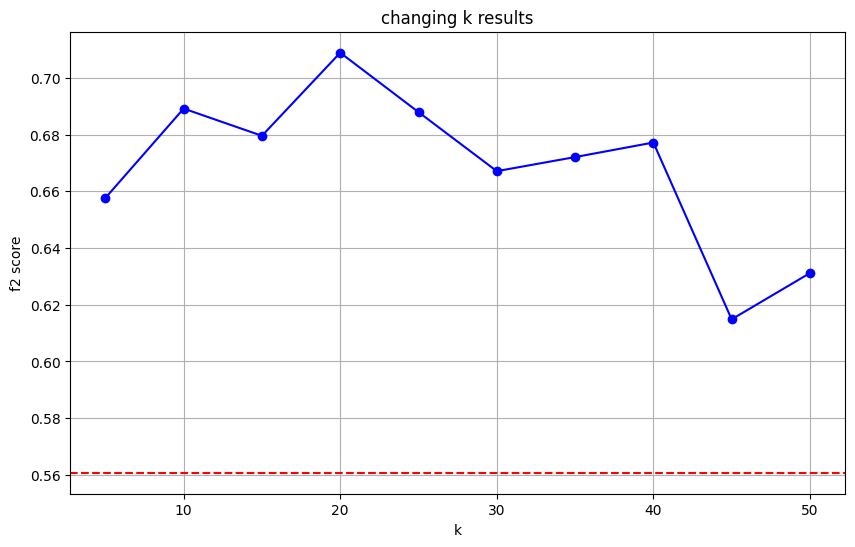

In [191]:

plt.figure(figsize=(10, 6))
# Plot the line graph
plt.plot(values_of_k, fbeta_scores, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel("k")
plt.ylabel("f2 score")
plt.title("changing k results")
plt.axhline(y=base_line_f2_score, color='r', linestyle='--', label='Baseline')
# Add grid lines for clarity
plt.grid(True)

# play_ground
caution: no clean code
ignore it

In [192]:
        # if len(total_test) > 0:
        #   print(len(subset_train_labels))
        # total_test+=subset_train_labels.tolist()
        # total_predict+=y_pred.tolist()
        # elif len(total_test) == 0:
        #    total_test =subset_train_labels.tolist()
        #    total_predict = y_pred.tolist()

In [193]:
def calculate_confusion_matrix_elements(recall, perception, support,total):
    if perception == 0:
      perception = 1
    tp = recall * support
    fn = support - tp
    fp = round(tp/perception) - tp
    tn = total - (tp + fp + fn)

    return tp, fp, tn, fn

In [194]:
from sklearn.metrics import classification_report
import re

def calculate_total_population(report_str):
    # Extract numerical values using regular expressions
    pattern = r"\s+(\d+)\s+[\d.]+\s+[\d.]+\s+[\d.]+\s+(\d+)"
    matches = re.findall(pattern, report_str)

    # Sum the support values for all classes
    total_population = sum(int(match[1]) for match in matches)

    return total_population

In [195]:
def get_confusion_matrix_elements(report_str, target_class):
    # Define a regular expression pattern to extract metrics for the target class
    pattern = rf"{target_class}\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)"
    total_population = calculate_total_population(report_str)
    # Use re.search to find the pattern in the report string
    match = re.search(pattern, report_str)

    # Extract individual metrics
    if match:
        precision = float(match.group(1))
        recall = float(match.group(2))
        f1_score = float(match.group(3))
        support = int(match.group(4))

        print(f"Metrics for Class {target_class}:")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1_score}")
        print(f"Support: {support}")

        # Calculate confusion matrix elements
        tp, fp, tn, fn = calculate_confusion_matrix_elements(recall, precision, support,total_population)

        print(f"True Positives: {tp}")
        print(f"False Positives: {fp}")
        print(f"True Negatives: {tn}")
        print(f"False Negatives: {fn}")

        return tp, fp, tn, fn
    else:
        print(f"Class {target_class} not found in the classification report.")
        return 0, 0, 0, 0